# Various Ways to Train a DNN on MNIST Dataset

In this notebook, I have trained nine different neural networks (both shallow and deep) to achieve the best test/validation accuracy on the MNIST dataset. The best results were achieved by a CNN - Acc = 98.4% and Val. Acc = 99.12%. These are very good results.

The neural networks were modelled, compiled and trained using Keras sub-library of Tensorflow.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Load the Dataset

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Shape of training dataset: ", train_images.shape)
print("Shape of training labels: ", train_labels.shape)

Shape of training dataset:  (60000, 28, 28)
Shape of training labels:  (60000,)


In [4]:
print("Shape of testing dataset: ", test_images.shape)
print("Shape of testing labels: ", test_labels.shape)

Shape of testing dataset:  (10000, 28, 28)
Shape of testing labels:  (10000,)


This means that each image is of dimension $28 \times 28$.

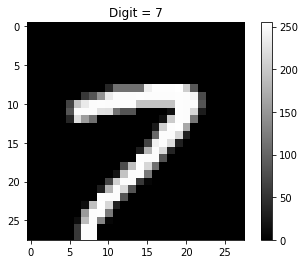

In [5]:
#Example Image
plt.imshow(train_images[123], cmap='gray')
plt.title("Digit = "+str(train_labels[123]))
plt.colorbar()
plt.show()

## Normalize the image

Since the pixels in our image contain a value inr ange of 0 to 255, we will normalize it (between 0 and 1) to achieve the best results. 

In [6]:
#Normalizing the data
train_images = train_images/255.0
test_images = test_images/255.0

## Model 1. A simple shallow network with 128 nodes

In [7]:
#Creating a deep neural network model using keras
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model1.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.0705 - acc: 0.9788 - val_loss: 0.0773 - val_acc: 0.9772
Epoch 2/10
54000/54000 [==============================] - 5s 93us/step - loss: 0.0529 - acc: 0.9844 - val_loss: 0.0815 - val_acc: 0.9760
Epoch 3/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.0411 - acc: 0.9875 - val_loss: 0.0730 - val_acc: 0.9778
Epoch 4/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.0332 - acc: 0.9899 - val_loss: 0.0737 - val_acc: 0.9788
Epoch 5/10
54000/54000 [==============================] - 5s 93us/step - loss: 0.0258 - acc: 0.9927 - val_loss: 0.0674 - val_acc: 0.9825
Epoch 6/10
54000/54000 [==============================] - 5s 97us/step - loss: 0.0215 - acc: 0.9932 - val_loss: 0.0729 - val_acc: 0.9808
Epoch 7/10
54000/54000 [==============================] - 6s 105us/step - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0773 - val_acc

In [11]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 38us/step
Test accuracy: 0.9763


In [17]:
def plot_history(history):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['acc'], label="Training Accuracy")
    plt.plot(history.history['val_acc'], label="Validation Accuracy")
    plt.grid()
    plt.legend()
    plt.title("Training Metrics")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

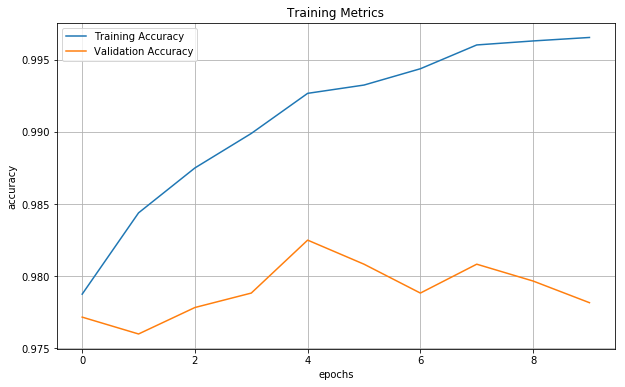

In [18]:
plot_history(history)

This is not a good model. Even though we have a pretty good accuracy, it is overfitting the data as validation accuracy is lower than training accuracy. We'll see in other models how we can do better.

## Model 2. Similar model as above but with one-hot encoding for labels

Since this is a classification task, it is advisable to use one-hot encoding. We one-hot encode labels when we don't want our model to pick up any correlation between the labels, for example, the number 4 isn't greater than number 3 in a classification task - it's just another clas of classification.

In [19]:
num_classes = 10
train_labels_cat = keras.utils.to_categorical(train_labels, num_classes)
test_labels_cat = keras.utils.to_categorical(test_labels, num_classes)

print("First 5 training lables as one-hot encoded vectors:\n", train_labels_cat[:5], train_labels[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [5 0 4 1 9]


In [20]:
#Creating a deep neural network model using keras
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit(train_images, train_labels_cat, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 105us/step - loss: 0.2729 - acc: 0.9213 - val_loss: 0.1211 - val_acc: 0.9655
Epoch 2/10
54000/54000 [==============================] - 5s 102us/step - loss: 0.1238 - acc: 0.9629 - val_loss: 0.1039 - val_acc: 0.9713
Epoch 3/10
54000/54000 [==============================] - 5s 97us/step - loss: 0.0845 - acc: 0.9743 - val_loss: 0.0841 - val_acc: 0.9750
Epoch 4/10
54000/54000 [==============================] - 5s 93us/step - loss: 0.0639 - acc: 0.9801 - val_loss: 0.0829 - val_acc: 0.9747
Epoch 5/10
54000/54000 [==============================] - 5s 95us/step - loss: 0.0493 - acc: 0.9845 - val_loss: 0.0734 - val_acc: 0.9773
Epoch 6/10
54000/54000 [==============================] - 5s 93us/step - loss: 0.0378 - acc: 0.9883 - val_loss: 0.0783 - val_acc: 0.9780
Epoch 7/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.0318 - acc: 0.9902 - val_loss: 0.0762 - val_ac

In [21]:
test_loss, test_acc = model2.evaluate(test_images, test_labels_cat)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/step
Test accuracy: 0.9789


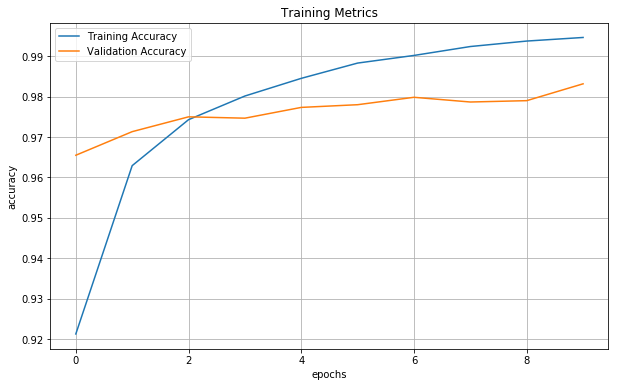

In [22]:
plot_history(history)

Slightly better but still not as good as we would like it to be.

## Model 3. Using SGD optimizer instead of Adam

SGD is just another kind of optimizer. However, adam ooptimizer is said to be a better choice in this case but we can try nonetheless. SGD often requires more epochs to converge to a minimum, therefore we will also iterate over more epochs.

In [26]:
#Creating a deep neural network model using keras
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model3.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model3.fit(train_images, train_labels_cat, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 79us/step - loss: 0.6984 - acc: 0.8262 - val_loss: 0.3256 - val_acc: 0.9167
Epoch 2/20
54000/54000 [==============================] - 4s 75us/step - loss: 0.3544 - acc: 0.9015 - val_loss: 0.2626 - val_acc: 0.9252
Epoch 3/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.3032 - acc: 0.9150 - val_loss: 0.2332 - val_acc: 0.9365
Epoch 4/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.2722 - acc: 0.9234 - val_loss: 0.2118 - val_acc: 0.9417
Epoch 5/20
54000/54000 [==============================] - 4s 73us/step - loss: 0.2489 - acc: 0.9304 - val_loss: 0.1968 - val_acc: 0.9458
Epoch 6/20
54000/54000 [==============================] - 4s 75us/step - loss: 0.2300 - acc: 0.9359 - val_loss: 0.1835 - val_acc: 0.9497
Epoch 7/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.2144 - acc: 0.9400 - val_loss: 0.1736 - val_acc:

In [27]:
test_loss, test_acc = model3.evaluate(test_images, test_labels_cat)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/step
Test accuracy: 0.9652


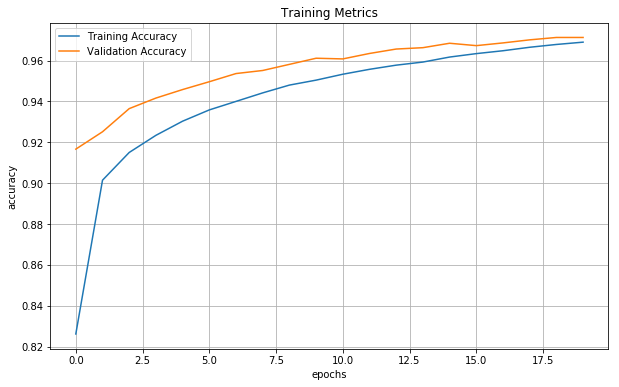

In [28]:
plot_history(history)

This is our first model that isnt overfitting. However the test accuracy is still lower than the previous models and not as high as we can go.

## Model 4. Increasing the depth

Increasing the depth helps the neural network learn subtle features and differences between images. However, it also takes longer to train such a model.

In [29]:
#Creating a deep neural network model using keras
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model4.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model4.fit(train_images, train_labels_cat, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 111us/step - loss: 0.2421 - acc: 0.9292 - val_loss: 0.1043 - val_acc: 0.9692
Epoch 2/20
54000/54000 [==============================] - 6s 111us/step - loss: 0.1003 - acc: 0.9691 - val_loss: 0.0773 - val_acc: 0.9775
Epoch 3/20
54000/54000 [==============================] - 6s 113us/step - loss: 0.0688 - acc: 0.9789 - val_loss: 0.0941 - val_acc: 0.9733
Epoch 4/20
54000/54000 [==============================] - 6s 109us/step - loss: 0.0529 - acc: 0.9823 - val_loss: 0.0861 - val_acc: 0.9738
Epoch 5/20
54000/54000 [==============================] - 6s 115us/step - loss: 0.0427 - acc: 0.9864 - val_loss: 0.0816 - val_acc: 0.9782
Epoch 6/20
54000/54000 [==============================] - 6s 105us/step - loss: 0.0345 - acc: 0.9884 - val_loss: 0.0730 - val_acc: 0.9810
Epoch 7/20
54000/54000 [==============================] - 6s 105us/step - loss: 0.0266 - acc: 0.9912 - val_loss: 0.0766 - v

In [30]:
test_loss, test_acc = model4.evaluate(test_images, test_labels_cat)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/step
Test accuracy: 0.9784


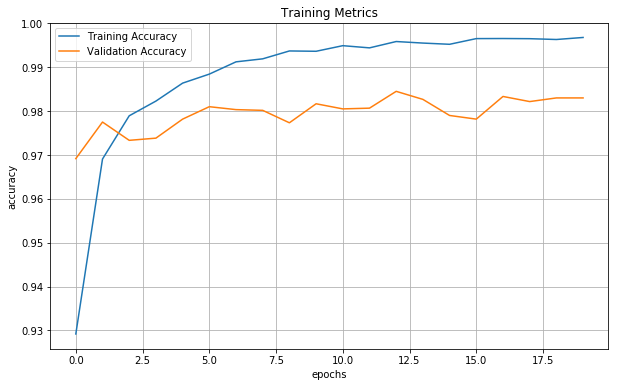

In [31]:
plot_history(history)

We have very high training accuracy and good enough testing accuracy. However the model shows hints of overfitting as validation accuracy intersects with training accuracy.

## Model 5. Increasing nodes but keeping the network shallow

In [32]:
#Creating a deep neural network model using keras
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2048, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model5.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model5.fit(train_images, train_labels_cat, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 47s 866us/step - loss: 0.1872 - acc: 0.9428 - val_loss: 0.0774 - val_acc: 0.9770
Epoch 2/10
54000/54000 [==============================] - 46s 856us/step - loss: 0.0785 - acc: 0.9753 - val_loss: 0.0736 - val_acc: 0.9793
Epoch 3/10
54000/54000 [==============================] - 46s 860us/step - loss: 0.0476 - acc: 0.9845 - val_loss: 0.0793 - val_acc: 0.9782
Epoch 4/10
54000/54000 [==============================] - 47s 866us/step - loss: 0.0353 - acc: 0.9884 - val_loss: 0.0940 - val_acc: 0.9772
Epoch 5/10
54000/54000 [==============================] - 47s 867us/step - loss: 0.0269 - acc: 0.9913 - val_loss: 0.0730 - val_acc: 0.9833
Epoch 6/10
54000/54000 [==============================] - 48s 882us/step - loss: 0.0231 - acc: 0.9926 - val_loss: 0.0942 - val_acc: 0.9780
Epoch 7/10
54000/54000 [==============================] - 46s 856us/step - loss: 0.0195 - acc: 0.9935 - val_loss: 0.0

In [33]:
test_loss, test_acc = model5.evaluate(test_images, test_labels_cat)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 153us/step
Test accuracy: 0.9806


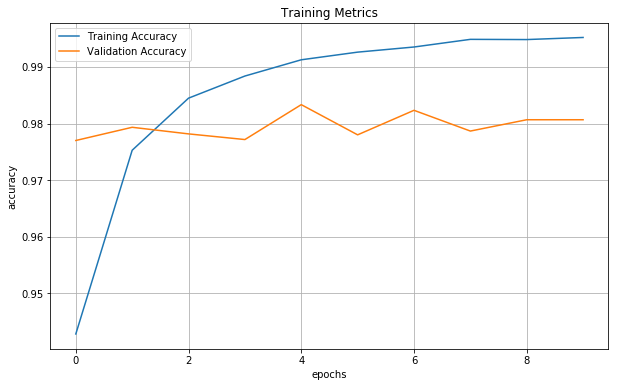

In [34]:
plot_history(history)

Still overfitting, but better testing accuracy than other models. It also took less epochs for Model 5 to raech a desired accuracy as compared to Model 4.

## Model 6. Shallow network with 1024 nodes

In [35]:
#Creating a deep neural network model using keras
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model6.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model6.fit(train_images, train_labels_cat, validation_split=.1, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 25s 468us/step - loss: 0.1978 - acc: 0.9417 - val_loss: 0.0956 - val_acc: 0.9727
Epoch 2/10
54000/54000 [==============================] - 25s 465us/step - loss: 0.0798 - acc: 0.9756 - val_loss: 0.0898 - val_acc: 0.9718
Epoch 3/10
54000/54000 [==============================] - 24s 436us/step - loss: 0.0497 - acc: 0.9844 - val_loss: 0.0689 - val_acc: 0.9795
Epoch 4/10
54000/54000 [==============================] - 24s 435us/step - loss: 0.0342 - acc: 0.9890 - val_loss: 0.0716 - val_acc: 0.9810
Epoch 5/10
54000/54000 [==============================] - 24s 436us/step - loss: 0.0275 - acc: 0.9906 - val_loss: 0.0638 - val_acc: 0.9822
Epoch 6/10
54000/54000 [==============================] - 24s 442us/step - loss: 0.0217 - acc: 0.9929 - val_loss: 0.0946 - val_acc: 0.9752
Epoch 7/10
54000/54000 [==============================] - 24s 441us/step - loss: 0.0179 - acc: 0.9940 - val_loss: 0.0

In [36]:
test_loss, test_acc = model6.evaluate(test_images, test_labels_cat)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 90us/step
Test accuracy: 0.9799


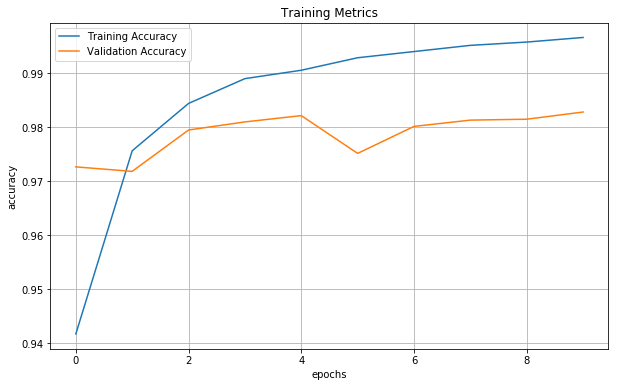

In [37]:
plot_history(history)

Accuracy and fitting is barely affected, however training time has decreased. Prefer this model over 2048 nodes.

## Model 7. A 4-hidden layer network with 32 nodes in each laye

In [38]:
#Creating a deep neural network model using keras
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model7.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model7.fit(train_images, train_labels_cat, epochs=40, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 5s 84us/step - loss: 0.3811 - acc: 0.8858 - val_loss: 0.1643 - val_acc: 0.9525
Epoch 2/40
54000/54000 [==============================] - 4s 70us/step - loss: 0.1818 - acc: 0.9466 - val_loss: 0.1403 - val_acc: 0.9580
Epoch 3/40
54000/54000 [==============================] - 4s 72us/step - loss: 0.1421 - acc: 0.9569 - val_loss: 0.1099 - val_acc: 0.9670
Epoch 4/40
54000/54000 [==============================] - 4s 71us/step - loss: 0.1203 - acc: 0.9635 - val_loss: 0.1318 - val_acc: 0.9620
Epoch 5/40
54000/54000 [==============================] - 4s 72us/step - loss: 0.1047 - acc: 0.9681 - val_loss: 0.1142 - val_acc: 0.9690
Epoch 6/40
54000/54000 [==============================] - 4s 72us/step - loss: 0.0949 - acc: 0.9708 - val_loss: 0.1045 - val_acc: 0.9710
Epoch 7/40
54000/54000 [==============================] - 4s 72us/step - loss: 0.0847 - acc: 0.9732 - val_loss: 0.1106 - val_acc:

In [39]:
test_loss, test_acc = model7.evaluate(test_images, test_labels_cat)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.9699


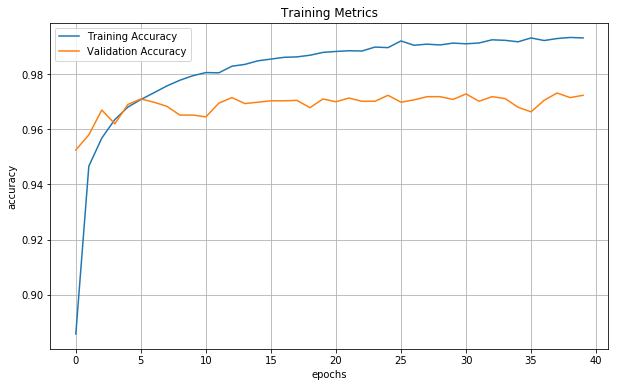

In [40]:
plot_history(history)

This seems to be an overly complex model for a simple classification task. The results are not that much better but the complexity is significantly higher.

## Model 8. Adding a dropout layer often increases the accuracy

A dropout layer prevents over-fitting by randomly dropping out a portion of data incoming from a layer.

In [41]:
#Creating a deep neural network model using keras
model8 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(784, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(784, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model8.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model8.fit(train_images, train_labels_cat, validation_split=.1, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 39s 720us/step - loss: 0.2084 - acc: 0.9351 - val_loss: 0.0929 - val_acc: 0.9715
Epoch 2/10
54000/54000 [==============================] - 35s 648us/step - loss: 0.1046 - acc: 0.9674 - val_loss: 0.0753 - val_acc: 0.9783
Epoch 3/10
54000/54000 [==============================] - 36s 661us/step - loss: 0.0791 - acc: 0.9762 - val_loss: 0.0712 - val_acc: 0.9795
Epoch 4/10
54000/54000 [==============================] - 35s 657us/step - loss: 0.0629 - acc: 0.9798 - val_loss: 0.0718 - val_acc: 0.9793
Epoch 5/10
54000/54000 [==============================] - 36s 664us/step - loss: 0.0544 - acc: 0.9830 - val_loss: 0.0645 - val_acc: 0.9825
Epoch 6/10
54000/54000 [==============================] - 36s 664us/step - loss: 0.0462 - acc: 0.9849 - val_loss: 0.0672 - val_acc: 0.9805
Epoch 7/10
54000/54000 [==============================] - 36s 664us/step - loss: 0.0421 - acc: 0.9871 - val_loss: 0.0

In [42]:
test_loss, test_acc = model8.evaluate(test_images, test_labels_cat)

print('Test accuracy:', test_acc)#Creating a deep neural network model using keras

10000/10000 [==============================] - 1s 116us/step
Test accuracy: 0.984


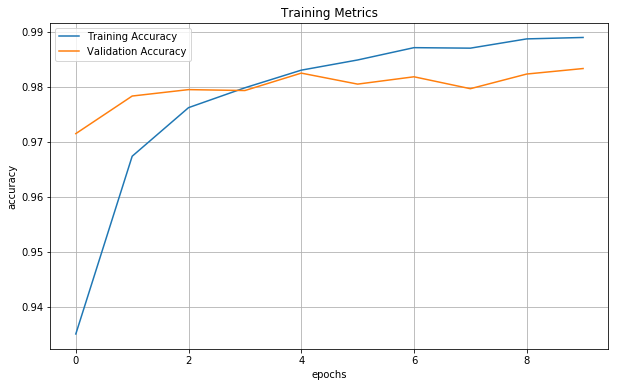

In [43]:
plot_history(history)

Our model is still slightly overfitting but the results are much better.

## Model 9. A different approach - Using a CNN to achieve better accuracy

This approach is significantly different than other models. We will use a deep CNN to learn the features of our dataset much better. A CNN requires relatively less pre-processing and produces much better results.

In [44]:
model9 = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), padding='Same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), padding='Same', activation=tf.nn.relu),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding='Same', activation=tf.nn.relu),
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding='Same', activation=tf.nn.relu),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [45]:
#Setting up a custom optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [46]:
model9.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [48]:
history = model9.fit(train_images.reshape(-1, 28, 28, 1), train_labels_cat, batch_size=86,
                     epochs=2, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 330s 6ms/step - loss: 0.2116 - acc: 0.9342 - val_loss: 0.0426 - val_acc: 0.9883
Epoch 2/2
54000/54000 [==============================] - 328s 6ms/step - loss: 0.0643 - acc: 0.9811 - val_loss: 0.0338 - val_acc: 0.9912


Note: It only takes two epochs two train this network, however, the epochs are longer.

In [50]:
print("Validation Accuracy: {:5.2f}%".format(100*history.history["val_acc"][1]))
print("Training Accuracy: {:5.2f}%".format(100*history.history["acc"][1]))
test_loss, test_acc = model8.evaluate(test_images, test_labels_cat, verbose=False)
print("Testing Accuracy: {:5.2f}%".format(100*test_acc))

Validation Accuracy: 99.12%
Training Accuracy: 98.11%
Testing Accuracy: 98.40%


This is the best result so far! Since we only trained for two epochs, we can't plot the accuracy chart. However, considering the metrics, the validation accracy remains higher than accuracy during both the epochs so this model is not overfitting. All three forms of accuracy are quite high - hence, a good model.

## Summary of all models

In [61]:
for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7, model8, model9]):
    print("Model Number: ", (i+1))
    model.summary()
    print("\n")

Model Number:  1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Model Number:  2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
__________________________________